# THIS DATA ABOUT PREDICTING THE OCCURANCE OF DIABETES IN PIMA INDIANS

### Importing libraries

importing all the libraries which are necessary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Here I am using the dataset that I got from kaggle.
The url for the dataset is : https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [2]:
data = pd.read_csv("./data/pima-data.csv")

This basically shows that there are about 768 records and 10 features

In [3]:
data.shape

(768, 10)

This gives the data inside the dataset. The number inside the data.head(n) where n is the number of records

In [4]:
data.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


Here all the features except the diabetes are independent features.

In [5]:
# check if any null value is present
data.isnull().values.any()

False

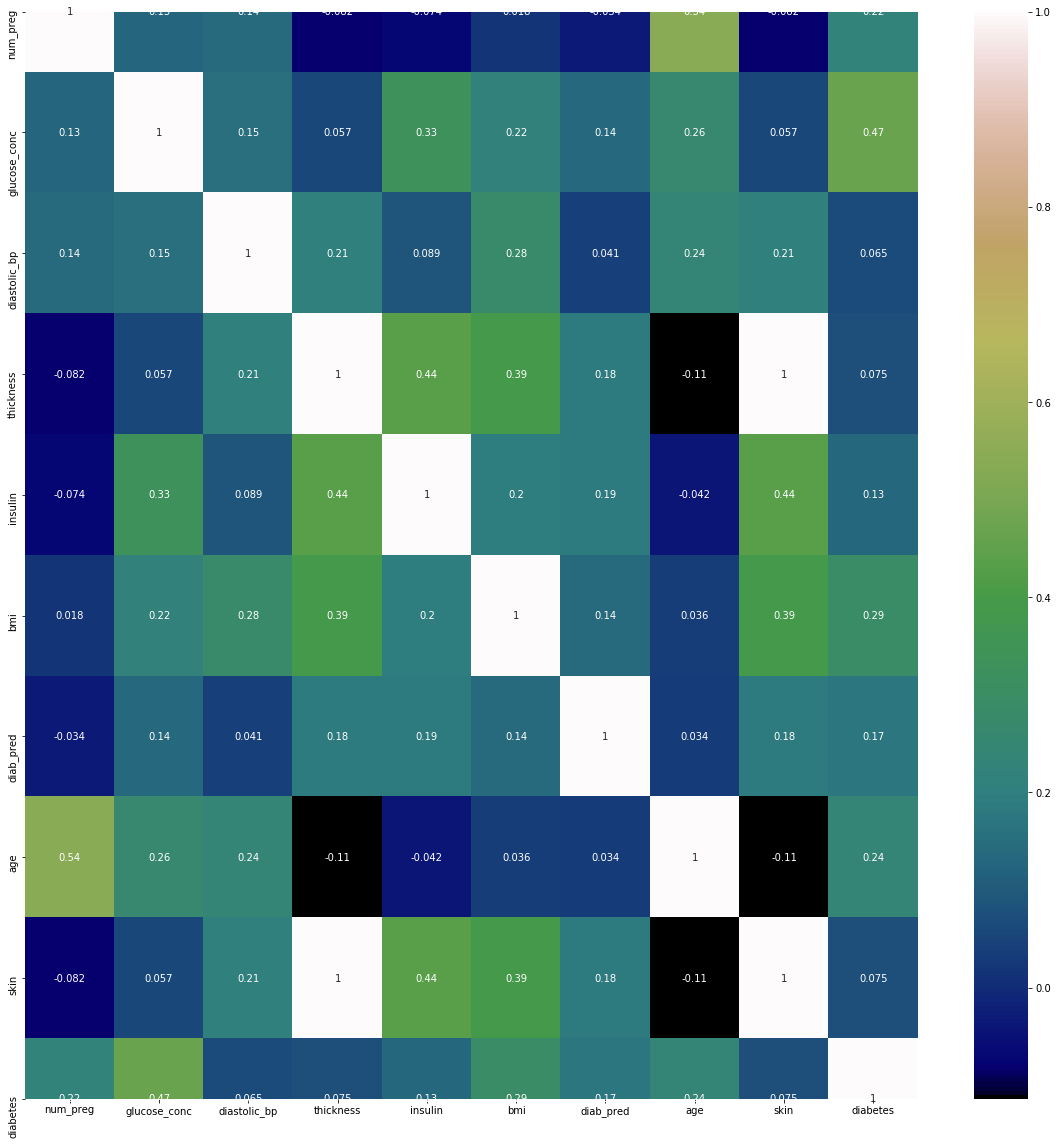

In [6]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="gist_earth")

Seaborn Python is a data visualization library based on Matplotlib.

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. This gives how much the data is correlated. The correlation values range from -1 to 1.

you can find all colormaps in this link: http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [7]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


If we consider our output feature i.e., diabetes, The output values is true or false. I need to convert them into 0's and 1's.

In [8]:
diabetes_map = {True: 1, False: 0}

In [9]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [10]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


I checked if the dataset is balanced or not.

In [11]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [12]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [13]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']

In [14]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

## Checking if there are any missing or zero values:

In [15]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


imputer: Missing values can be imputed with a provided constant value, or using the statistics of each column in which the missing values are located. 

If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

This is Data Imputation.

In [16]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

C:\Users\pramo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
## RandomForestClassifier ML Algorithm

from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 35 , random_state=42)

k-fold cross validation ensures that every observation from the original dataset has the chance of appearing in training and test set.
Repeat this process until every K-fold serve as the test set. 
Then take the average of your recorded scores. 
That will be the performance metric for the model.

In [18]:
##K-fold Cross validation

from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = RFC, X= X_train, y=y_train.ravel(), cv=10)
print("Accuracy mean: ",np.mean(accuraccies))

Accuracy mean:  0.7616536433517566


#### ravel() returns a view of the original array whenever possible

In [19]:
 ## learning

RFC.fit(X_train,y_train.ravel())
print("Accuracy Score: ",RFC.score(X_test,y_test))
RFCscore = RFC.score(X_test,y_test)

Accuracy Score:  0.7532467532467533


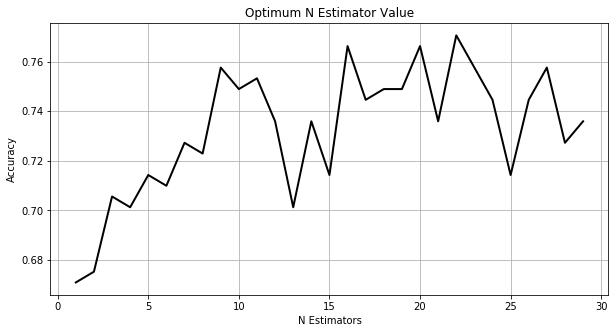

In [20]:
##Optimum value of K

scores = []
for each in range(1,30):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(X_train,y_train.ravel())
    scores.append(RFfind.score(X_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,30),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [22]:
##Perceptron Algorithm

from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train_std, y_train.ravel())

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
y_test_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_test_pred).sum())

Misclassified samples: 24486


In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[114,  30],
       [ 40,  47]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy score: ", accuracy_score(y_test, y_test_pred))
print("Precision score: ", precision_score(y_test, y_test_pred, average=None))
print("Recall score: ", recall_score(y_test, y_test_pred, average=None))

Accuracy score:  0.696969696969697
Precision score:  [0.74025974 0.61038961]
Recall score:  [0.79166667 0.54022989]


In [26]:
##ROC CURVE

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

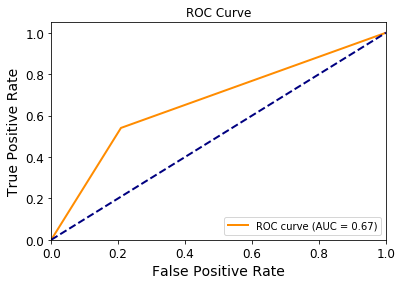

In [28]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()